In [1]:
import scipy.stats as scipystats
import matplotlib.pyplot as plt
import numpy as np
import numpy
import re
from scipy.stats import beta
import sys, os, math
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Deemed colorblind safe: http://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=3
highConfColor     ='#1b9e77'
medConfColor      ='#7570b3'
lowConfColor      ='#d95f02'
unclassifiedColor ='black'

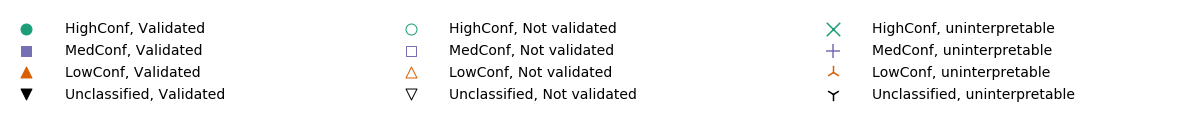

In [2]:
fig = plt.figure(figsize=(21, 2))

markersize = 60

ax = fig.add_subplot(111)

ax.scatter(0, 1-0.05*1, color=highConfColor,     s=markersize*2, marker='o')
ax.scatter(0, 1-0.05*2, color=medConfColor,      s=markersize*2, marker='s')
ax.scatter(0, 1-0.05*3, color=lowConfColor,      s=markersize*2, marker='^')
ax.scatter(0, 1-0.05*4, color=unclassifiedColor, s=markersize*2, marker='v')

ax.text(0.1, 1-0.05*1-0.01, 'HighConf, Validated', size=14)
ax.text(0.1, 1-0.05*2-0.01, 'MedConf, Validated', size=14)
ax.text(0.1, 1-0.05*3-0.01, 'LowConf, Validated', size=14)
ax.text(0.1, 1-0.05*4-0.01, 'Unclassified, Validated', size=14)


ax.scatter(1, 1-0.05*1, color=highConfColor,     facecolor='white', s=markersize*2, marker='o')
ax.scatter(1, 1-0.05*2, color=medConfColor,      facecolor='white', s=markersize*2, marker='s')
ax.scatter(1, 1-0.05*3, color=lowConfColor,      facecolor='white', s=markersize*2, marker='^')
ax.scatter(1, 1-0.05*4, color=unclassifiedColor, facecolor='white', s=markersize*2, marker='v')


ax.text(1.1, 1-0.05*1-0.01, 'HighConf, Not validated', size=14)
ax.text(1.1, 1-0.05*2-0.01, 'MedConf, Not validated', size=14)
ax.text(1.1, 1-0.05*3-0.01, 'LowConf, Not validated', size=14)
ax.text(1.1, 1-0.05*4-0.01, 'Unclassified, Not validated', size=14)


ax.scatter(2.1, 1-0.05*1,  color=highConfColor,      s=markersize*3, marker='x')
ax.scatter(2.1, 1-0.05*2, color=medConfColor,       s=markersize*3, marker='+')
ax.scatter(2.1, 1-0.05*3, color=lowConfColor,       s=markersize*3, marker='2')
ax.scatter(2.1, 1-0.05*4, color=unclassifiedColor,  s=markersize*3, marker='1')

ax.text(2.2, 1-0.05*1-0.01, 'HighConf, uninterpretable', size=14)
ax.text(2.2, 1-0.05*2-0.01, 'MedConf, uninterpretable', size=14)
ax.text(2.2, 1-0.05*3-0.01, 'LowConf, uninterpretable', size=14)
ax.text(2.2, 1-0.05*4-0.01, 'Unclassified, uninterpretable', size=14)


ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

ax.set_xlim((-0.05, 3))
ax.set_ylim((0.75, 1.0))

plt.savefig('../Main_Figures/Fig_2d-f_legends.pdf', bbox_inches='tight')

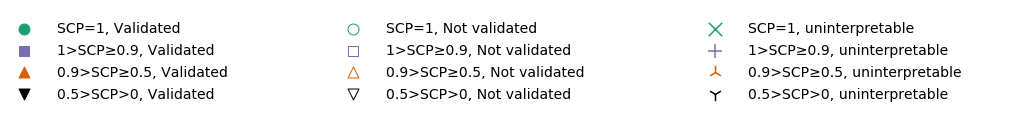

In [3]:
fig = plt.figure(figsize=(18, 2))

markersize = 60

ax = fig.add_subplot(111)

ax.scatter(0, 1-0.05*1, color=highConfColor,     s=markersize*2, marker='o')
ax.scatter(0, 1-0.05*2, color=medConfColor,      s=markersize*2, marker='s')
ax.scatter(0, 1-0.05*3, color=lowConfColor,      s=markersize*2, marker='^')
ax.scatter(0, 1-0.05*4, color=unclassifiedColor, s=markersize*2, marker='v')

ax.text(0.1, 1-0.05*1-0.01, 'SCP=1, Validated', size=14)
ax.text(0.1, 1-0.05*2-0.01, '1>SCP≥0.9, Validated', size=14)
ax.text(0.1, 1-0.05*3-0.01, '0.9>SCP≥0.5, Validated', size=14)
ax.text(0.1, 1-0.05*4-0.01, '0.5>SCP>0, Validated', size=14)


ax.scatter(1, 1-0.05*1, color=highConfColor,     facecolor='white', s=markersize*2, marker='o')
ax.scatter(1, 1-0.05*2, color=medConfColor,      facecolor='white', s=markersize*2, marker='s')
ax.scatter(1, 1-0.05*3, color=lowConfColor,      facecolor='white', s=markersize*2, marker='^')
ax.scatter(1, 1-0.05*4, color=unclassifiedColor, facecolor='white', s=markersize*2, marker='v')


ax.text(1.1, 1-0.05*1-0.01, 'SCP=1, Not validated', size=14)
ax.text(1.1, 1-0.05*2-0.01, '1>SCP≥0.9, Not validated', size=14)
ax.text(1.1, 1-0.05*3-0.01, '0.9>SCP≥0.5, Not validated', size=14)
ax.text(1.1, 1-0.05*4-0.01, '0.5>SCP>0, Not validated', size=14)


ax.scatter(2.1, 1-0.05*1,  color=highConfColor,      s=markersize*3, marker='x')
ax.scatter(2.1, 1-0.05*2, color=medConfColor,       s=markersize*3, marker='+')
ax.scatter(2.1, 1-0.05*3, color=lowConfColor,       s=markersize*3, marker='2')
ax.scatter(2.1, 1-0.05*4, color=unclassifiedColor,  s=markersize*3, marker='1')

ax.text(2.2, 1-0.05*1-0.01, 'SCP=1, uninterpretable', size=14)
ax.text(2.2, 1-0.05*2-0.01, '1>SCP≥0.9, uninterpretable', size=14)
ax.text(2.2, 1-0.05*3-0.01, '0.9>SCP≥0.5, uninterpretable', size=14)
ax.text(2.2, 1-0.05*4-0.01, '0.5>SCP>0, uninterpretable', size=14)


ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

ax.set_xlim((-0.05, 3))
ax.set_ylim((0.75, 1.0))

plt.savefig('../Main_Figures/Fig_3b-c_legends.pdf', bbox_inches='tight')

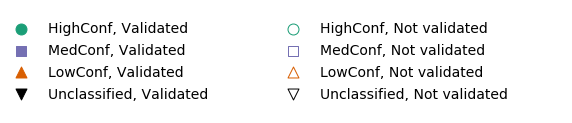

In [11]:
fig = plt.figure(figsize=(10, 2))

markersize = 60

ax = fig.add_subplot(111)

ax.scatter(0, 1-0.05*1, color=highConfColor,     s=markersize*2, marker='o')
ax.scatter(0, 1-0.05*2, color=medConfColor,      s=markersize*2, marker='s')
ax.scatter(0, 1-0.05*3, color=lowConfColor,      s=markersize*2, marker='^')
ax.scatter(0, 1-0.05*4, color=unclassifiedColor, s=markersize*2, marker='v')

ax.text(0.1, 1-0.05*1-0.01, 'HighConf, Validated', size=14)
ax.text(0.1, 1-0.05*2-0.01, 'MedConf, Validated', size=14)
ax.text(0.1, 1-0.05*3-0.01, 'LowConf, Validated', size=14)
ax.text(0.1, 1-0.05*4-0.01, 'Unclassified, Validated', size=14)


ax.scatter(1, 1-0.05*1, color=highConfColor,     facecolor='white', s=markersize*2, marker='o')
ax.scatter(1, 1-0.05*2, color=medConfColor,      facecolor='white', s=markersize*2, marker='s')
ax.scatter(1, 1-0.05*3, color=lowConfColor,      facecolor='white', s=markersize*2, marker='^')
ax.scatter(1, 1-0.05*4, color=unclassifiedColor, facecolor='white', s=markersize*2, marker='v')


ax.text(1.1, 1-0.05*1-0.01, 'HighConf, Not validated', size=14)
ax.text(1.1, 1-0.05*2-0.01, 'MedConf, Not validated', size=14)
ax.text(1.1, 1-0.05*3-0.01, 'LowConf, Not validated', size=14)
ax.text(1.1, 1-0.05*4-0.01, 'Unclassified, Not validated', size=14)


ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

ax.set_xlim((-0.05, 2))
ax.set_ylim((0.75, 1.0))

plt.savefig('../Main_Figures/Fig_2d-f_legends.pdf', bbox_inches='tight')

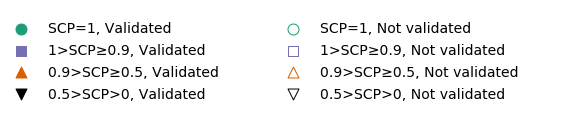

In [13]:
fig = plt.figure(figsize=(10, 2))

markersize = 60

ax = fig.add_subplot(111)

ax.scatter(0, 1-0.05*1, color=highConfColor,     s=markersize*2, marker='o')
ax.scatter(0, 1-0.05*2, color=medConfColor,      s=markersize*2, marker='s')
ax.scatter(0, 1-0.05*3, color=lowConfColor,      s=markersize*2, marker='^')
ax.scatter(0, 1-0.05*4, color=unclassifiedColor, s=markersize*2, marker='v')

ax.text(0.1, 1-0.05*1-0.01, 'SCP=1, Validated', size=14)
ax.text(0.1, 1-0.05*2-0.01, '1>SCP≥0.9, Validated', size=14)
ax.text(0.1, 1-0.05*3-0.01, '0.9>SCP≥0.5, Validated', size=14)
ax.text(0.1, 1-0.05*4-0.01, '0.5>SCP>0, Validated', size=14)


ax.scatter(1, 1-0.05*1, color=highConfColor,     facecolor='white', s=markersize*2, marker='o')
ax.scatter(1, 1-0.05*2, color=medConfColor,      facecolor='white', s=markersize*2, marker='s')
ax.scatter(1, 1-0.05*3, color=lowConfColor,      facecolor='white', s=markersize*2, marker='^')
ax.scatter(1, 1-0.05*4, color=unclassifiedColor, facecolor='white', s=markersize*2, marker='v')


ax.text(1.1, 1-0.05*1-0.01, 'SCP=1, Not validated', size=14)
ax.text(1.1, 1-0.05*2-0.01, '1>SCP≥0.9, Not validated', size=14)
ax.text(1.1, 1-0.05*3-0.01, '0.9>SCP≥0.5, Not validated', size=14)
ax.text(1.1, 1-0.05*4-0.01, '0.5>SCP>0, Not validated', size=14)


ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

ax.set_xlim((-0.05, 2))
ax.set_ylim((0.75, 1.0))

plt.savefig('../Main_Figures/Fig_3b-c_legends.pdf', bbox_inches='tight')